In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Data Science\project p166\AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
# convert date column into datetime format
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [6]:
# set date column as index
data.set_index('Date',inplace=True)

In [7]:
# drop columns irrelevant
data.drop(['Adj Close','Volume'],inplace=True,axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143
2012-01-04,58.571430,59.240002,58.468571,59.062859
2012-01-05,59.278572,59.792858,58.952858,59.718571
2012-01-06,59.967144,60.392857,59.888573,60.342857
2012-01-09,60.785713,61.107143,60.192856,60.247143


In [8]:
data_close = pd.DataFrame(data['Close'],columns=['Close'])
data_close

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2019-12-23,284.000000
2019-12-24,284.269989
2019-12-26,289.910004


### SARIMA

In [9]:
model_sarima_final = sm.tsa.SARIMAX(data_close.Close,order=(2,1,0),seasonal_order=(1,1,0,63))
sarima_fit_final = model_sarima_final.fit()

In [10]:
# Forecasting for next 30 days
forecast = sarima_fit_final.predict(len(data_close),len(data_close)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Close']
forecast_df

,Close
2011,292.331817
2012,290.573766
2013,291.412306
2014,292.350411
2015,292.989321
2016,292.672426
2017,293.232303
2018,295.531667
2019,299.531149
2020,299.004780


In [11]:
# Set appropriate date as index for plotting forecast data
datetime = pd.date_range('2020-01-01', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['Date'])

data_forecast = forecast_df.set_index(date_df.Date)
data_forecast

,Close
Date,
2020-01-01,292.331817
2020-01-02,290.573766
2020-01-03,291.412306
2020-01-06,292.350411
2020-01-07,292.989321
2020-01-08,292.672426
2020-01-09,293.232303
2020-01-10,295.531667
2020-01-13,299.531149


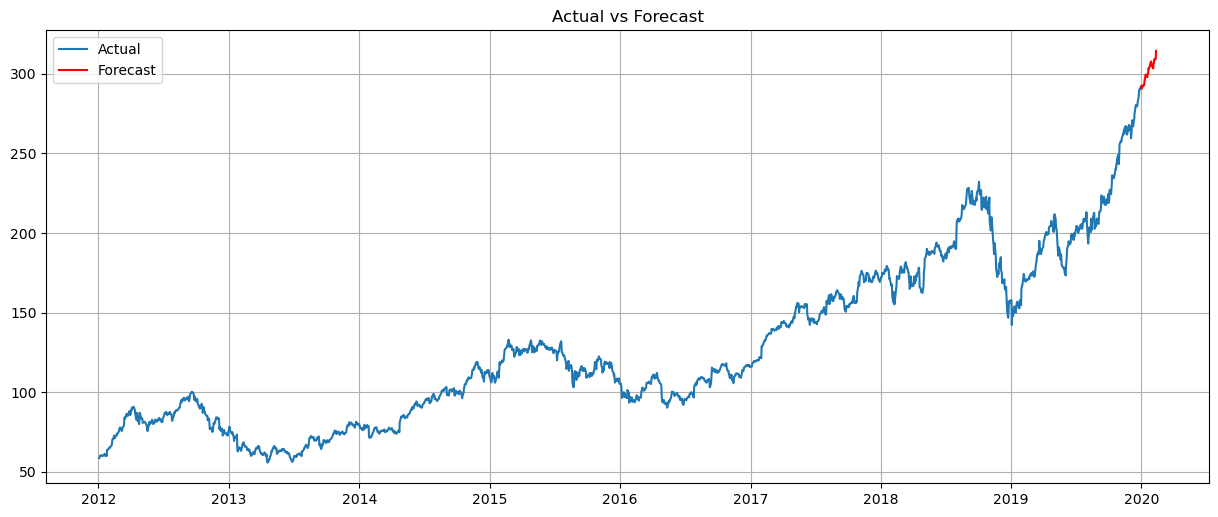

In [12]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(data_close, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

## Deployment

In [13]:
!pip install dump
from pickle import dump

In [14]:
#dump(sarima_fit_final,open('sarima_fit_final.sav','wb'))


  Created wheel for dump: filename=dump-0.0.5-py3-none-any.whl size=9016 sha256=2f622869e4729cebb8b00bd9aae911238358ecb8d45cb4cd7e93dcadc429f7c5
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6b\95\62\0507d7240adbdf04003bfde5d4009b6f6ba9afcc2e8b5c42a1
Successfully built dump


In [15]:
dump(data_close,open('data_close.sav','wb'))
dump(datetime,open('datetime.sav','wb'))

In [21]:
st.pyplot()